<a href="https://colab.research.google.com/github/sakshimohta/soil_prediction/blob/main/Soil_Prediction_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
import ipywidgets as widgets
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.model_selection import KFold

In [ ]:
url = "https://raw.githubusercontent.com/Icegreen04/pbl/main/pbl%20dataset.csv"
dataset = pd.read_csv(url)
dataset

,District_Name,Soil_color,Nitrogen,Phosphorus,Potassium,pH,Rainfall,Temperature,Crop,Fertilizer
0,Kolhapur,Black,75,50,100,6.5,1000,20,Sugarcane,Urea
1,Kolhapur,Black,80,50,100,6.5,1000,20,Sugarcane,Urea
2,Kolhapur,Black,85,50,100,6.5,1000,20,Sugarcane,Urea
3,Kolhapur,Black,90,50,100,6.5,1000,20,Sugarcane,Urea
4,Kolhapur,Black,95,50,100,6.5,1000,20,Sugarcane,Urea
...,...,...,...,...,...,...,...,...,...,...
4508,Pune,Black,130,80,150,7.0,1400,30,Sugarcane,MOP
4509,Pune,Black,135,80,150,7.0,1400,30,Sugarcane,MOP
4510,Pune,Black,140,80,150,7.0,1400,30,Sugarcane,MOP
4511,Pune,Black,145,80,150,7.0,1400,30,Sugarcane,MOP


In [ ]:
dataset.isnull().sum()

District_Name    0
Soil_color       0
Nitrogen         0
Phosphorus       0
Potassium        0
pH               0
Rainfall         0
Temperature      0
Crop             0
Fertilizer       0
dtype: int64

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4513 entries, 0 to 4512
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   District_Name  4513 non-null   object 
 1   Soil_color     4513 non-null   object 
 2   Nitrogen       4513 non-null   int64  
 3   Phosphorus     4513 non-null   int64  
 4   Potassium      4513 non-null   int64  
 5   pH             4513 non-null   float64
 6   Rainfall       4513 non-null   int64  
 7   Temperature    4513 non-null   int64  
 8   Crop           4513 non-null   object 
 9   Fertilizer     4513 non-null   object 
dtypes: float64(1), int64(5), object(4)
memory usage: 352.7+ KB


In [ ]:
dataset.duplicated().sum()

0

In [ ]:
dataset.describe()

,Nitrogen,Phosphorus,Potassium,pH,Rainfall,Temperature
count,4513.000000,4513.000000,4513.000000,4513.000000,4513.000000,4513.000000
mean,95.409927,54.341901,63.595170,6.715267,819.189010,25.915134
std,38.060648,16.551991,35.691911,0.625198,251.730813,5.897328
min,20.000000,10.000000,5.000000,5.500000,300.000000,10.000000
25%,60.000000,40.000000,40.000000,6.000000,600.000000,20.000000
50%,105.000000,55.000000,55.000000,6.500000,800.000000,25.000000
75%,125.000000,65.000000,75.000000,7.000000,1000.000000,30.000000
max,150.000000,90.000000,150.000000,8.500000,1700.000000,40.000000


In [ ]:
dataset['Crop'].unique()

array(['Sugarcane', 'Jowar', 'Cotton', 'Rice', 'Wheat', 'Groundnut',
       'Maize', 'Tur', 'Urad', 'Moong', 'Gram', 'Masoor', 'Soybean',
       'Ginger', 'Turmeric', 'Grapes'], dtype=object)

C:\Users\saksh\AppData\Local\Temp\ipykernel_12652\1766229762.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bplot = sns.countplot(y='Crop',data=dataset, palette="muted")


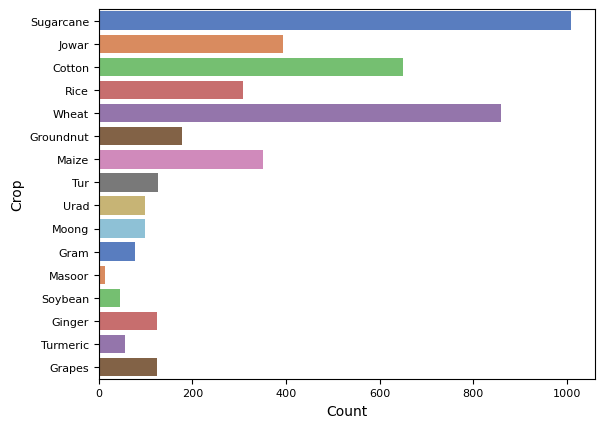

In [ ]:
bplot = sns.countplot(y='Crop',data=dataset, palette="muted")
bplot.set_ylabel('Crop', fontsize=10)
bplot.set_xlabel('Count', fontsize=10)
bplot.tick_params(labelsize=8)

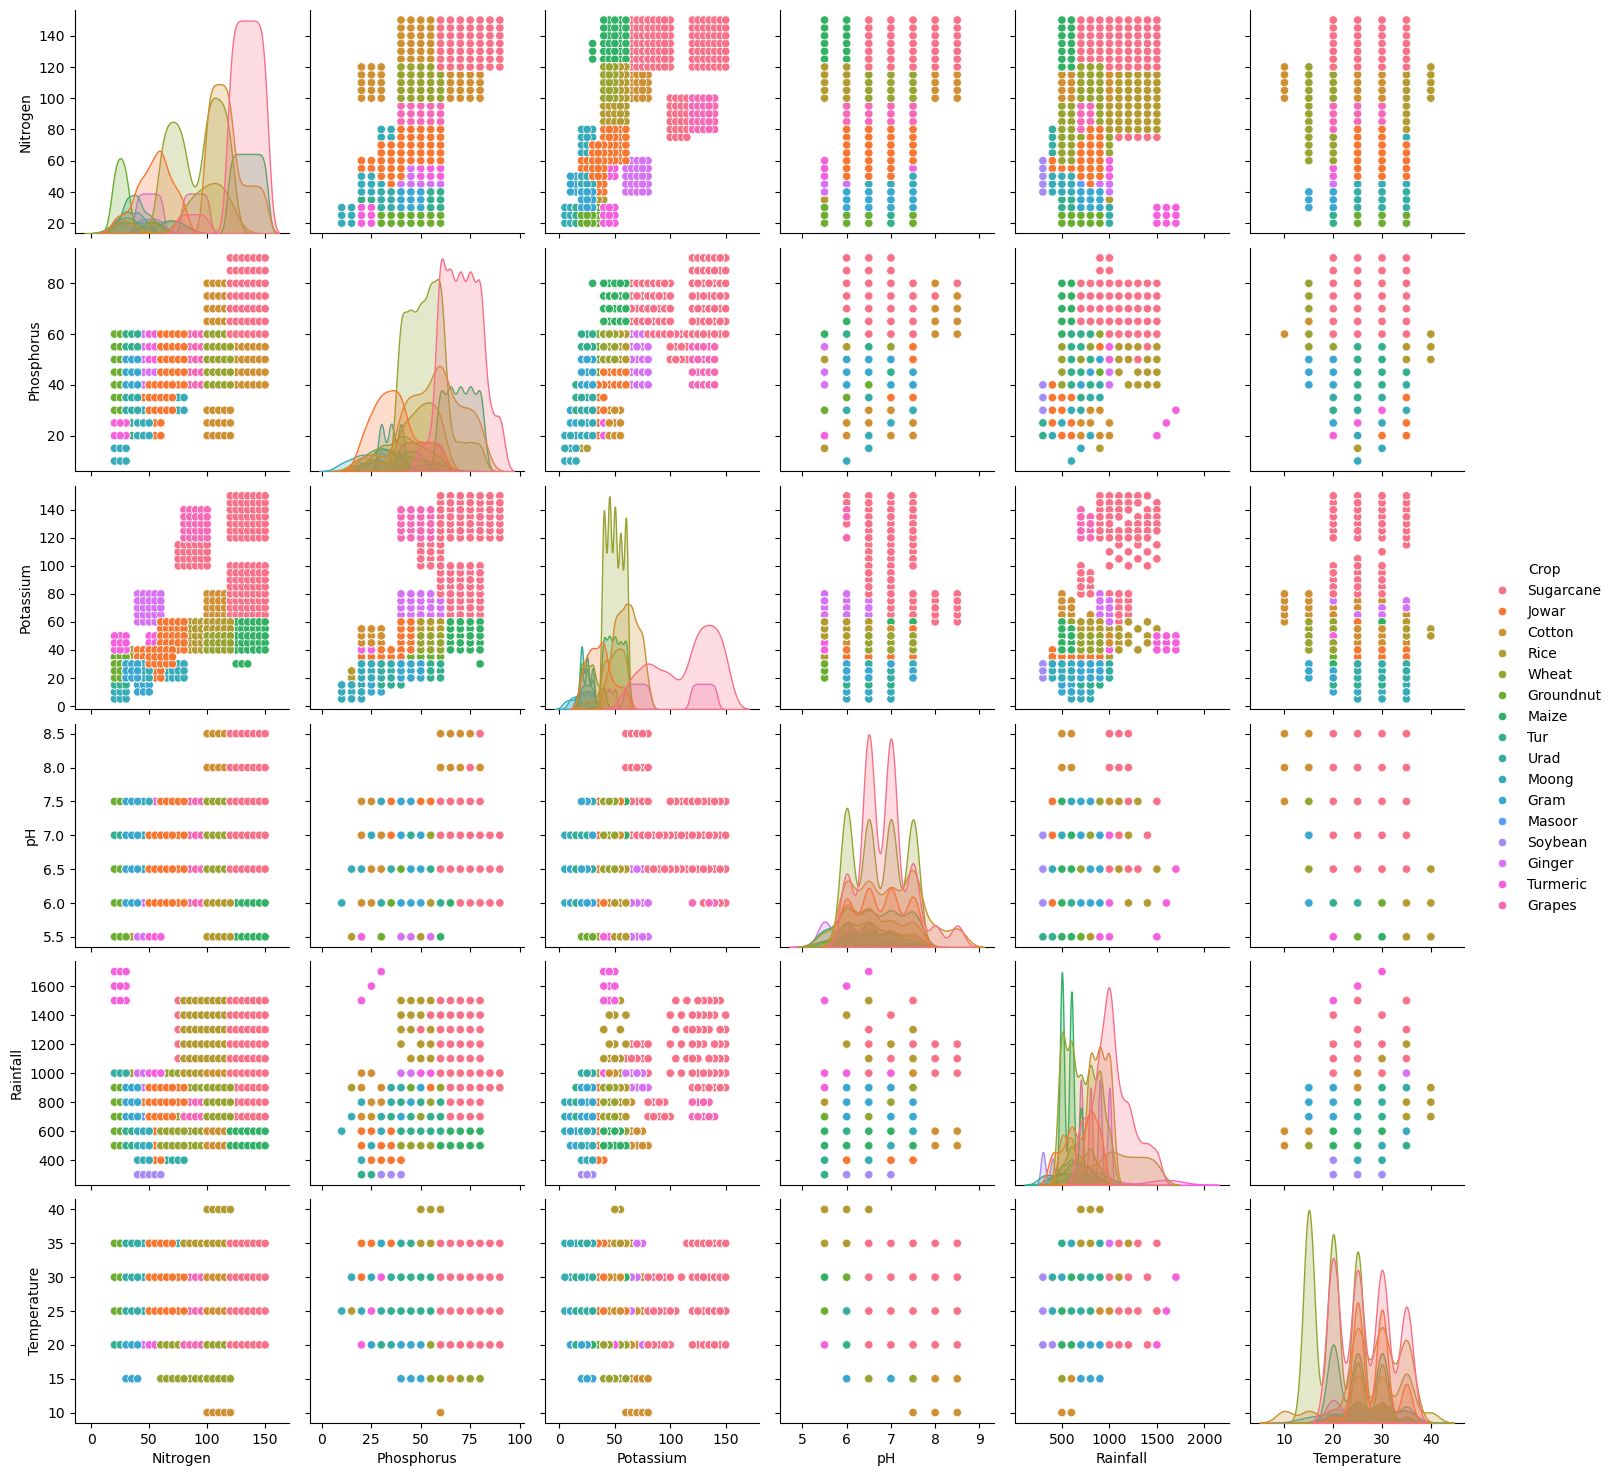

In [ ]:
sns.pairplot(data=dataset, hue = 'Crop')

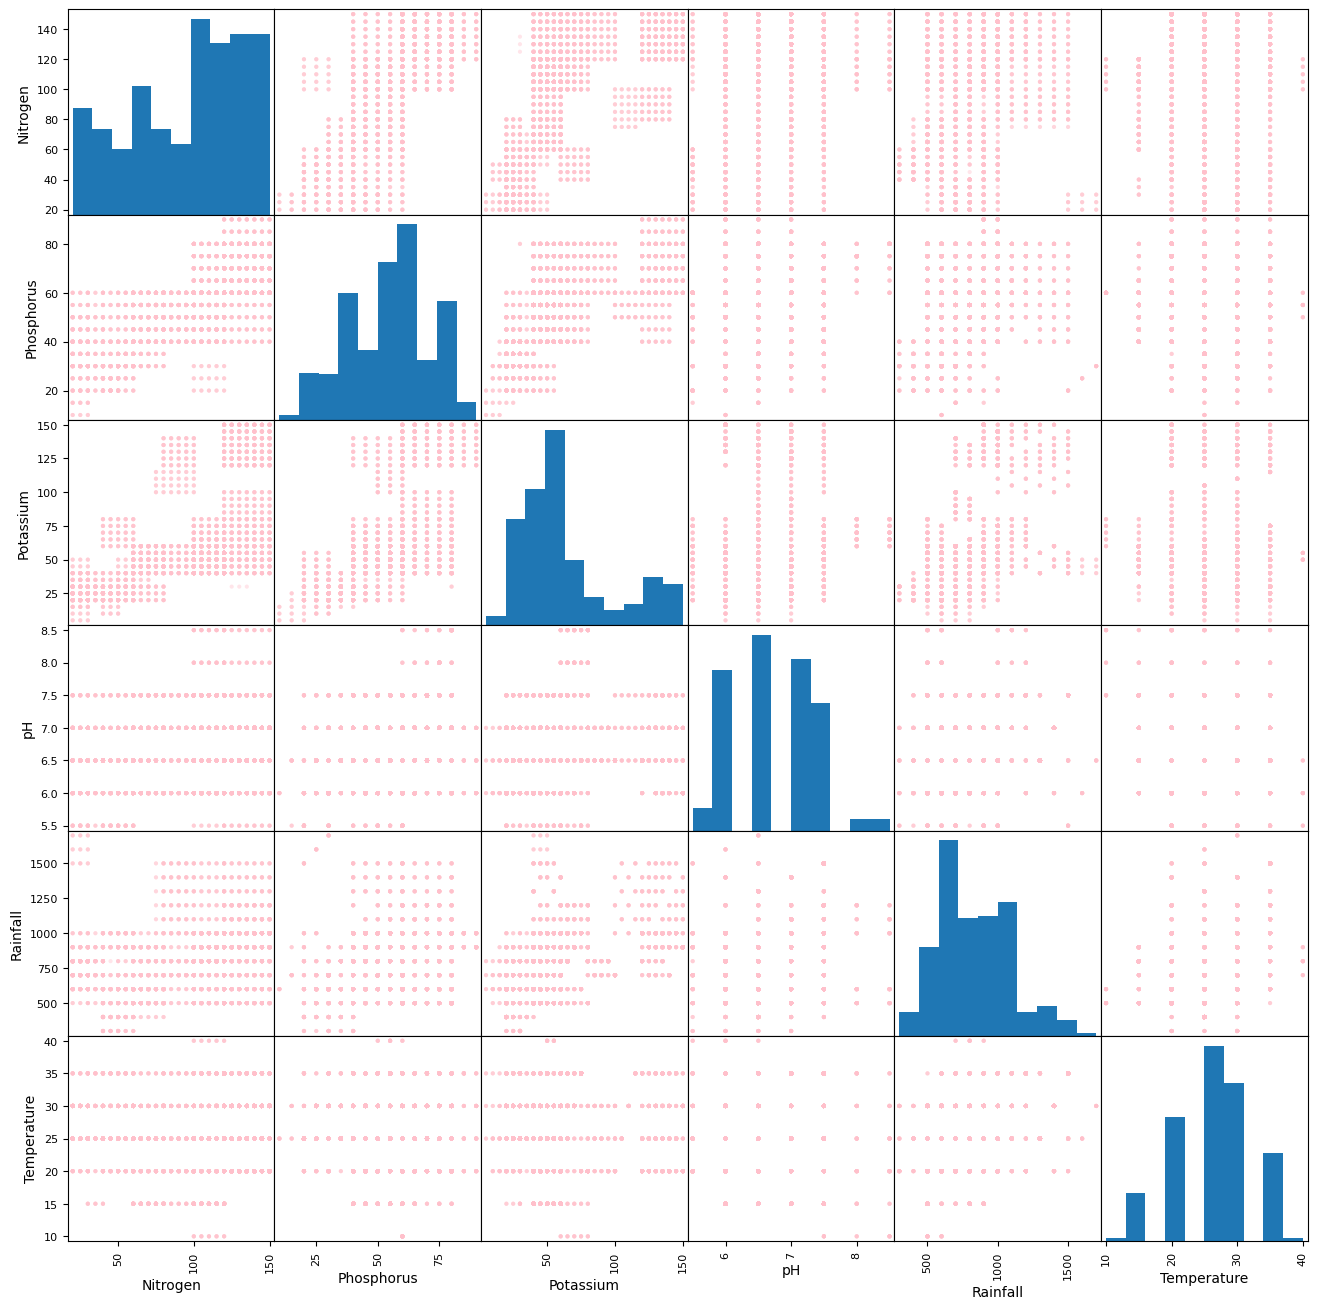

In [ ]:
scatter_matrix(dataset.drop('Crop', axis='columns'), figsize=(16, 16), marker='.', alpha=0.4, color='pink')

plt.show()

In [ ]:
encoded_dataset = pd.get_dummies(dataset)


corr = encoded_dataset.corr()
print(corr)

                                   Nitrogen  Phosphorus  Potassium        pH  \
Nitrogen                           1.000000    0.709539   0.584315  0.182850   
Phosphorus                         0.709539    1.000000   0.573970  0.244945   
Potassium                          0.584315    0.573970   1.000000  0.075110   
pH                                 0.182850    0.244945   0.075110  1.000000   
Rainfall                           0.269364    0.225453   0.445671  0.097884   
Temperature                       -0.010213   -0.055303   0.053413 -0.002949   
District_Name_Kolhapur             0.036715   -0.088889  -0.229418 -0.031489   
District_Name_Pune                 0.056495    0.059995   0.222298  0.007926   
District_Name_Sangli               0.066127    0.015611   0.031352 -0.055154   
District_Name_Satara              -0.032805    0.042814   0.216472 -0.161962   
District_Name_Solapur             -0.129989   -0.003121  -0.176486  0.279201   
Soil_color_Black                  -0.012

<Axes: >

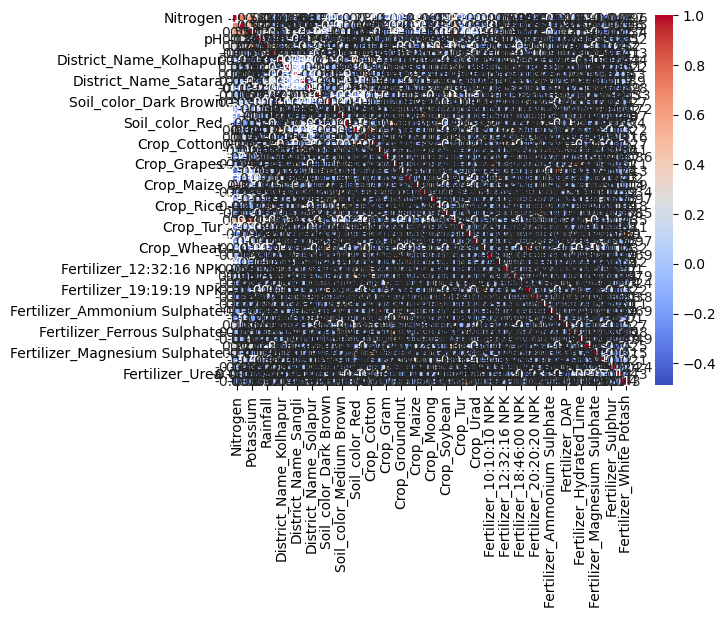

In [ ]:
sns.heatmap(corr,annot=True,cbar=True , cmap='coolwarm')

In [ ]:
r = dataset.Crop.astype('category')
response = dict(enumerate(r.cat.categories))
dataset['response']=r.cat.codes

y=dataset.response
X=dataset[['Nitrogen','Phosphorus','Potassium','Temperature','pH','Rainfall']]

#Convert labels into categories codes and then declaring set x, y variables

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=10)

In [ ]:
len(X_train)

3610

In [ ]:

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
model_svm = svm.SVC(kernel='rbf', C=10)

In [ ]:

model_svm.fit(X_train_scaled, y_train)


y_pred = model_svm.predict(X_test_scaled)


accuracy = round(accuracy_score(y_test, y_pred),3)
print("Accuracy: ",accuracy)

Accuracy:  0.927


In [ ]:
precision = round(precision_score(y_test, y_pred, average='weighted',zero_division=1),3)
recall = round(recall_score(y_test, y_pred, average='weighted'),3)
f1 = round(f1_score(y_test, y_pred, average='weighted'),3)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:",f1)

Precision: 0.933
Recall: 0.927
F1 Score: 0.926


In [ ]:
kfold = KFold(n_splits=5, shuffle=True, random_state=10)

scores = []
for train_index, test_index in kfold.split(X):
    X_train3, y_train3 = X.iloc[train_index], y.iloc[train_index]
    X_test3, y_test3 = X.iloc[test_index], y.iloc[test_index]
    model_svm.fit(X_train3, y_train3)

    y_pred = model_svm.predict(X_test3)
    score = accuracy_score(y_test3, y_pred)

    scores.append(score)

mean_accuracy = round(sum(scores) / len(scores),3)

print("Mean Accuracy:",mean_accuracy)

Mean Accuracy: 0.783


In [ ]:
model_dt = DecisionTreeClassifier(max_depth = 10, criterion = 'gini', random_state=10)

In [ ]:
model_dt = DecisionTreeClassifier(max_depth = 10, criterion = 'gini', random_state=10)

In [ ]:
model_dt.fit(X_train_scaled,y_train)

DecisionTreeClassifier(max_depth=10, random_state=10)

In [ ]:
y_pred = model_dt.predict(X_test_scaled)

accuracy = round(accuracy_score(y_test, y_pred),3)
print("Accuracy: ",accuracy)

Accuracy:  0.894


In [ ]:
kfold = KFold(n_splits=5, shuffle=True, random_state=10)

scores = []
for train_index, test_index in kfold.split(X):
    X_train2, y_train2 = X.iloc[train_index], y.iloc[train_index]
    X_test2, y_test2 = X.iloc[test_index], y.iloc[test_index]

    model_dt.fit(X_train2, y_train2)

    y_pred = model_dt.predict(X_test2)
    score = accuracy_score(y_test2, y_pred)

    scores.append(score)

mean_accuracy = round(sum(scores) / len(scores),3)

print("Mean accuracy:",mean_accuracy)

Mean accuracy: 0.909


In [ ]:
model_rf = RandomForestClassifier(max_depth=6, n_estimators=120, random_state=10)

In [ ]:
model_rf.fit(X_train_scaled, y_train)

RandomForestClassifier(max_depth=6, n_estimators=120, random_state=10)

In [ ]:
y_pred = model_rf.predict(X_test_scaled)

accuracy = round(accuracy_score(y_test, y_pred),3)
print("Accuracy: ",accuracy)

Accuracy:  0.837


In [ ]:
precision = round(precision_score(y_test, y_pred, average='weighted',zero_division=1),3)
recall = round(recall_score(y_test, y_pred, average='weighted'),3)
f1 = round(f1_score(y_test, y_pred, average='weighted'),3)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:",f1)

Precision: 0.878
Recall: 0.837
F1 Score: 0.823


In [ ]:
# K-fold Cross Validation
kfold = KFold(n_splits=5, shuffle=True, random_state=10)

#k-fold iteration
scores = []
for train_index, test_index in kfold.split(X):
    X_train_k, y_train_k = X.iloc[train_index], y.iloc[train_index]
    X_test_k, y_test_k = X.iloc[test_index], y.iloc[test_index]
    model_rf.fit(X_train_k, y_train_k)

    y_pred = model_rf.predict(X_test_k)
    score = accuracy_score(y_test_k, y_pred)

    #Append the accuracy score for this fold to the list of scores
    scores.append(score)

#Mean accuracy across all folds
mean_accuracy = round(sum(scores) / len(scores),3)

print("Mean Accuracy:",mean_accuracy)

Mean Accuracy: 0.856


([<matplotlib.axis.XTick at 0x17f0353bad0>,
 [Text(0, 0, 'Potassium'),
  Text(1, 0, 'Nitrogen'),
  Text(2, 0, 'Rainfall'),
  Text(3, 0, 'Phosphorus'),
  Text(4, 0, 'Temperature'),
  Text(5, 0, 'pH')])

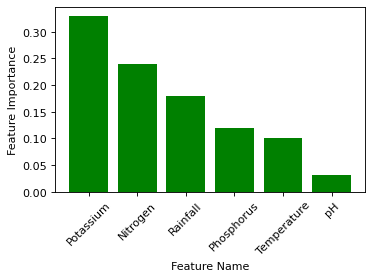

In [ ]:
plt.figure(figsize=(5, 3), dpi=80)
importance_sorted = sorted(zip(model_rf.feature_importances_, X_train.columns), reverse=True)
feature_importance = [imp for imp, _ in importance_sorted]
feature_names = [name for _, name in importance_sorted]

c_features = len(feature_importance)
plt.bar(range(c_features), feature_importance, color = "green")
plt.ylabel("Feature Importance")
plt.xlabel("Feature Name")
plt.xticks(np.arange(c_features), feature_names, rotation=45)

In [ ]:

district_widget = widgets.Combobox(
    options=tuple(dataset['District_Name'].unique()),
    description='District:',
    placeholder='Select district',
    ensure_option=True
)

soil_color_widget = widgets.Combobox(
    description='Soil Color:',
    placeholder='Select soil color',
    ensure_option=True
)

nitrogen_widget = widgets.Combobox(
    description='Nitrogen:',
    placeholder='Select nitrogen value',
    ensure_option=True
)

phosphorus_widget = widgets.Combobox(
    description='Phosphorus:',
    placeholder='Select phosphorus value',
    ensure_option=True
)

potassium_widget = widgets.Combobox(
    description='Potassium:',
    placeholder='Select potassium value',
    ensure_option=True
)

ph_widget = widgets.Combobox(
    description='pH:',
    placeholder='Select pH value',
    ensure_option=True
)

rainfall_widget = widgets.Combobox(
    description='Rainfall:',
    placeholder='Select rainfall value',
    ensure_option=True
)

temperature_widget = widgets.Combobox(
    description='Temperature:',
    placeholder='Select temperature value',
    ensure_option=True
)

recommend_widget = widgets.Output()



def update_soil_color_options(change):
    district = change.new
    if district:
        soil_colors = dataset[dataset['District_Name'] == district]['Soil_color'].unique()
        soil_color_widget.options = tuple(soil_colors)
    else:
        soil_color_widget.options = ()

def update_nitrogen_options(change):
    district = district_widget.value
    soil_color = soil_color_widget.value
    if district and soil_color:
        nitrogen_values = dataset[(dataset['District_Name'] == district) & (dataset['Soil_color'] == soil_color)]['Nitrogen'].unique()
        nitrogen_values = [str(value) for value in nitrogen_values]
        nitrogen_widget.options = tuple(nitrogen_values)
    else:
        nitrogen_widget.options = ()

def update_phosphorus_options(change):
    district = district_widget.value
    soil_color = soil_color_widget.value
    if district and soil_color:
        phosphorus_values = dataset[(dataset['District_Name'] == district) & (dataset['Soil_color'] == soil_color)]['Phosphorus'].unique()
        phosphorus_values = [str(value) for value in phosphorus_values]
        phosphorus_widget.options = tuple(phosphorus_values)
    else:
        phosphorus_widget.options = ()

def update_potassium_options(change):
    district = district_widget.value
    soil_color = soil_color_widget.value
    if district and soil_color:
        potassium_values = dataset[(dataset['District_Name'] == district) & (dataset['Soil_color'] == soil_color)]['Potassium'].unique()
        potassium_values = [str(value) for value in potassium_values]
        potassium_widget.options = tuple(potassium_values)
    else:
        potassium_widget.options = ()

def update_ph_options(change):
    district = district_widget.value
    soil_color = soil_color_widget.value
    if district and soil_color:
        ph_values = dataset[(dataset['District_Name'] == district) & (dataset['Soil_color'] == soil_color)]['pH'].unique()
        ph_values = [str(value) for value in ph_values]
        ph_widget.options = tuple(ph_values)
    else:
        ph_widget.options = ()

def update_rainfall_options(change):
    district = district_widget.value
    soil_color = soil_color_widget.value
    if district and soil_color:
        rainfall_values = dataset[(dataset['District_Name'] == district) & (dataset['Soil_color'] == soil_color)]['Rainfall'].unique()
        rainfall_values = [str(value) for value in rainfall_values]
        rainfall_widget.options = tuple(rainfall_values)
    else:
        rainfall_widget.options = ()

def update_temperature_options(change):
    district = district_widget.value
    soil_color = soil_color_widget.value
    if district and soil_color:
        temperature_values = dataset[(dataset['District_Name'] == district) & (dataset['Soil_color'] == soil_color)]['Temperature'].unique()
        temperature_values = [str(value) for value in temperature_values]
        temperature_widget.options = tuple(temperature_values)
    else:
        temperature_widget.options = ()



def train_model(change):

    district = district_widget.value
    soil_color = soil_color_widget.value
    nitrogen = float(nitrogen_widget.value)
    phosphorus = float(phosphorus_widget.value)
    potassium = float(potassium_widget.value)
    pH = float(ph_widget.value)
    rainfall = float(rainfall_widget.value)
    temperature = float(temperature_widget.value)


    input_data = pd.DataFrame(
        [[nitrogen, phosphorus, potassium, pH, rainfall, temperature, district, soil_color]],
        columns=['Nitrogen', 'Phosphorus', 'Potassium', 'pH', 'Rainfall', 'Temperature', 'District_Name', 'Soil_color']
    )


    encoder = OneHotEncoder(handle_unknown='ignore')
    X_encoded = encoder.fit_transform(dataset[['District_Name', 'Soil_color']])
    input_data_encoded = encoder.transform(input_data[['District_Name', 'Soil_color']])


    X_train, X_test, y_train, y_test = train_test_split(X_encoded, dataset['Crop'], test_size=0.2, random_state=42)


    model_crop = RandomForestClassifier(n_estimators=100, random_state=42)
    model_crop.fit(X_train, y_train)


    predicted_crop = model_crop.predict(input_data_encoded)


    recommended_fertilizer = dataset[dataset['Crop'] == predicted_crop[0]]['Fertilizer'].values[0]

    with recommend_widget:
        recommend_widget.clear_output()
        print("Recommended Crop:", predicted_crop[0])
        print("Recommended Fertilizer:", recommended_fertilizer)


district_widget.observe(update_soil_color_options, names='value')
district_widget.observe(update_nitrogen_options, names='value')
soil_color_widget.observe(update_nitrogen_options, names='value')


district_widget.observe(update_phosphorus_options, names='value')
soil_color_widget.observe(update_phosphorus_options, names='value')

district_widget.observe(update_potassium_options, names='value')
soil_color_widget.observe(update_potassium_options, names='value')

district_widget.observe(update_ph_options, names='value')
soil_color_widget.observe(update_ph_options, names='value')

district_widget.observe(update_rainfall_options, names='value')
soil_color_widget.observe(update_rainfall_options, names='value')

district_widget.observe(update_temperature_options, names='value')
soil_color_widget.observe(update_temperature_options, names='value')




button = widgets.Button(description='Train Model')

button.on_click(train_model)


widgets.VBox([district_widget, soil_color_widget, nitrogen_widget,phosphorus_widget,potassium_widget,ph_widget,rainfall_widget,temperature_widget,button,recommend_widget])